In [1]:
import pandas as pd 
import os 
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance


In [3]:
folder_path = '/Volumes/D/Earnings/data'
aggregate_str = 'aggregate.pkl'
aggregate_path = os.path.join(folder_path, aggregate_str)
aggregate = pd.read_pickle(aggregate_path)

In [4]:
aggregate.iloc[:, 0:10]

,id,url,file_from,tagged,transcript,clean,date,stock,tick,meeting_date
0,0,https://seekingalpha.com/article/4468898-xtant...,0005,"Xtant Medical Holdings, Inc. (NYSE:XTNT) Q3 20...","[Xtant Medical Holdings, Inc. (NYSE:XTNT) Q3 2...",xtant medical xtnt partners financial xtant fi...,2021-11-12,NYSE,XTNT,2021-11-12
1,1,https://seekingalpha.com/article/4468886-uni-s...,0005,Uni-Select Inc. (OTCPK:UNIEF) Q3 2021 Earnings...,[Uni-Select Inc. (OTCPK:UNIEF) Q3 2021 Earning...,otcpk unief legal corporate secretary financia...,2021-11-12,OTCPK,UNIEF,2021-11-12
2,3,https://seekingalpha.com/article/4468882-dents...,0005,Dentsu Group Inc. (OTCPK:DNTUF) Q3 2021 Earnin...,[Dentsu Group Inc. (OTCPK:DNTUF) Q3 2021 Earni...,dentsu otcpk dntuf dentsu network dentsu inter...,2021-11-12,OTCPK,DNTUF,2021-11-12
3,4,https://seekingalpha.com/article/4468879-sgl-c...,0005,SGL Carbon SE (OTCPK:SGLFF) Q3 2021 Earnings C...,[SGL Carbon SE (OTCPK:SGLFF) Q3 2021 Earnings ...,sgl otcpk sglff kellert investor dippold finan...,2021-11-12,OTCPK,SGLFF,2021-11-11
4,5,https://seekingalpha.com/article/4468877-konin...,0005,Koninklijke Vopak N.V. (OTCPK:VOPKF) Q3 2021 E...,[Koninklijke Vopak N.V. (OTCPK:VOPKF) Q3 2021 ...,koninklijke vopak otcpk vopkf investor hoekstr...,2021-11-12,OTCPK,VOPKF,2021-11-12
...,...,...,...,...,...,...,...,...,...,...
136517,24912,https://seekingalpha.com/article/4445480-arcos...,0200,"Arcosa, Inc. (NYSE:ACA) Q2 2021 Earnings Confe...","[Arcosa, Inc. (NYSE:ACA) Q2 2021 Earnings Conf...",arcosa zaffino thielman sidoti bergner gabelli...,2021-08-05,NYSE,ACA,2021-08-05
136518,24913,https://seekingalpha.com/article/4445479-renew...,0200,"Renewable Energy Group, Inc. (REGI) Q2 2021 Ea...","[Renewable Energy Group, Inc. (REGI) Q2 2021 E...",financial treasurer bealmear financial credit ...,2021-08-05,noInfo,REGI,2021-08-05
136519,24914,https://seekingalpha.com/article/4445472-becto...,0200,Becton Dickinson and Company (NYSE:BDX) Q3 202...,[Becton Dickinson and Company (NYSE:BDX) Q3 20...,investor administrative medical interventional...,2021-08-05,NYSE,BDX,2021-08-05
136520,24916,https://seekingalpha.com/article/4445469-bce-i...,0200,BCE Inc. (NYSE:BCE) Q2 2021 Earnings Conferenc...,[BCE Inc. (NYSE:BCE) Q2 2021 Earnings Conferen...,fotopoulos bibic financial securities galappat...,2021-08-05,NYSE,BCE,2021-08-05


In [5]:
X = pd.read_pickle(os.path.join(folder_path, 'X.pkl'))

In [6]:
y = pd.read_pickle(os.path.join(folder_path, 'y.pkl'))

In [7]:
main_data = pd.concat([aggregate.iloc[:, 0:10, ], X, y], axis=1)

In [8]:
main_data_sorted = main_data.sort_values('meeting_date')
main_data_sorted

,id,url,file_from,tagged,transcript,clean,date,stock,tick,meeting_date,...,Topic_8,Topic_9,Topic_10,LM_Positive,LM_Negative,LM_Uncertainty,neg,neu,pos,target
7373,5584,https://seekingalpha.com/article/3042986-arts-...,0015,"Art’s Way Manufacturing, Inc. (NASDAQ:ARTW) Q1...","[Art’s Way Manufacturing, Inc. (NASDAQ:ARTW) Q...",manufacturing artw majeski analysts rebotsky m...,2015-03-31,NASDAQ,ARTW,2011-03-31,...,0.117994,0.317289,0.000161,39,38,11,0.033,0.844,0.123,1
105986,9726,https://seekingalpha.com/article/2725865-cater...,0155,"Caterpillar, Inc. (NYSE:CAT) Credit Suisse 201...","[Caterpillar, Inc. (NYSE:CAT) Credit Suisse 20...",caterpillar credit services director investor ...,2014-12-02,NYSE,CAT,2011-12-02,...,0.317695,0.501337,0.000230,16,29,21,0.023,0.868,0.109,0
59179,209,https://seekingalpha.com/article/1094451-frank...,0095,Franklin Covey Company (NYSE:FC) F1Q2013 Earni...,[Franklin Covey Company (NYSE:FC) F1Q2013 Earn...,corporate controller financial marketing analy...,2013-01-04,NYSE,FC,2012-01-03,...,0.000088,0.209936,0.274138,76,65,21,0.007,0.844,0.148,1
39086,1162,https://seekingalpha.com/article/1103371-green...,0065,Greenbrier Companies Inc (NYSE:GBX) F1Q2013 Ea...,[Greenbrier Companies Inc (NYSE:GBX) F1Q2013 E...,corporate treasurer director rittenbaum financ...,2013-01-09,NYSE,GBX,2012-01-09,...,0.445294,0.409803,0.000124,49,56,15,0.021,0.867,0.112,1
55337,4811,https://seekingalpha.com/article/1227691-crown...,0085,Crown Castle International Corp. (NYSE:CCI) 14...,[Crown Castle International Corp. (NYSE:CCI) 1...,international svp treasurer analysts research ...,2013-02-26,NYSE,CCI,2012-01-12,...,0.054702,0.151755,0.233364,25,39,13,0.011,0.863,0.126,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14584,5731,https://seekingalpha.com/article/4610003-j-jil...,0025,"J.Jill, Inc. (NYSE:JILL) Q1 2023 Earnings Conf...","[J.Jill, Inc. (NYSE:JILL) Q1 2023 Earnings Con...",spofford operating kloppenburg jjk research sp...,2023-06-08,NYSE,JILL,2023-06-07,...,0.000271,0.092587,0.000271,23,27,9,0.023,0.825,0.152,1
5573,2958,https://seekingalpha.com/article/4610145-semte...,0015,Semtech Corporation (NASDAQ:SMTC) Q1 2024 Earn...,[Semtech Corporation (NASDAQ:SMTC) Q1 2024 Ear...,semtech corporation smtc anojja securities fbr...,2023-06-08,NASDAQ,SMTC,2023-06-07,...,0.644870,0.144094,0.199318,58,34,27,0.027,0.806,0.167,0
5567,2952,https://seekingalpha.com/article/4610188-trans...,0015,Transcontinental Inc. (OTCPK:TCLAF) wQ2 2023 E...,[Transcontinental Inc. (OTCPK:TCLAF) wQ2 2023 ...,otcpk tclaf director marcoux lecavalier nation...,2023-06-09,OTCPK,TCLAF,2023-06-08,...,0.000219,0.545147,0.000219,28,27,10,0.021,0.807,0.172,0
5565,2950,https://seekingalpha.com/article/4610226-mongo...,0015,"MongoDB, Inc. (NASDAQ:MDB) Annual William Blai...","[MongoDB, Inc. (NASDAQ:MDB) Annual William Bla...",mongodb research analyst tanjga svp mongodb ta...,2023-06-09,NASDAQ,MDB,2023-06-08,...,0.238519,0.000173,0.673610,27,51,5,0.021,0.834,0.145,1


In [9]:
#main_data_sorted.to_pickle('earnings_call_sorted.pickle')


In [9]:
ustop1000_str = 'ustop1000.csv'
top1000 = pd.read_csv(os.path.join(folder_path, ustop1000_str))

In [10]:
top1000['tick'] = top1000['Ticker'].astype(str)

In [11]:
large_companies = main_data_sorted[main_data_sorted['tick'].isin(top1000.tick)]

In [12]:
large_companies_filtered = large_companies.loc[:,['close', 'volume', 'sma50_close',
       'sma200_close', 'sma50_vol', 'sma200_vol', 'Topic_1',
       'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5', 'Topic_6', 'Topic_7',
       'Topic_8', 'Topic_9', 'Topic_10', 'LM_Positive', 'LM_Negative',
       'LM_Uncertainty', 'neg', 'neu', 'pos', 'target' ]]

In [13]:
large_companies_filtered

,close,volume,sma50_close,sma200_close,sma50_vol,sma200_vol,Topic_1,Topic_2,Topic_3,Topic_4,...,Topic_8,Topic_9,Topic_10,LM_Positive,LM_Negative,LM_Uncertainty,neg,neu,pos,target
105986,70.970985,7897900.0,64.237326,71.163323,10009586.0,9318148.5,0.002599,0.000230,0.000230,0.000230,...,0.317695,0.501337,0.000230,16,29,21,0.023,0.868,0.109,0
39086,21.003378,698100.0,17.940016,16.728446,553394.0,606444.0,0.009409,0.000124,0.016386,0.000124,...,0.445294,0.409803,0.000124,49,56,15,0.021,0.867,0.112,1
55337,35.011848,1498300.0,32.392282,31.888681,1565340.0,1909033.0,0.000218,0.000218,0.067031,0.000218,...,0.054702,0.151755,0.233364,25,39,13,0.011,0.863,0.126,1
47639,18.910593,60438600.0,18.425443,16.810141,49844844.0,60944394.5,0.000122,0.000122,0.042997,0.000122,...,0.925357,0.002655,0.000122,24,32,14,0.021,0.851,0.128,1
100626,23.676153,1058000.0,23.320022,22.704546,526898.0,602394.5,0.033752,0.056816,0.422191,0.178128,...,0.069883,0.025266,0.213676,48,80,21,0.017,0.839,0.144,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5600,29.930000,7268200.0,29.823200,28.585000,6788974.0,7697686.5,0.034914,0.000190,0.000190,0.000190,...,0.407876,0.053260,0.352552,35,29,7,0.012,0.834,0.154,1
5598,76.080002,7037500.0,80.601600,78.420000,5261222.0,6802321.0,0.000202,0.000202,0.000202,0.010307,...,0.000202,0.000202,0.000202,28,30,9,0.037,0.826,0.137,1
5596,171.339996,3090900.0,156.792800,170.375650,2047526.0,2484171.0,0.000144,0.000144,0.000144,0.000144,...,0.000144,0.000144,0.998704,42,25,4,0.028,0.848,0.124,0
5595,190.929993,1823100.0,197.505599,211.880000,1968992.0,1985476.0,0.000219,0.000219,0.156639,0.008724,...,0.057455,0.000219,0.575934,16,25,8,0.017,0.850,0.132,0


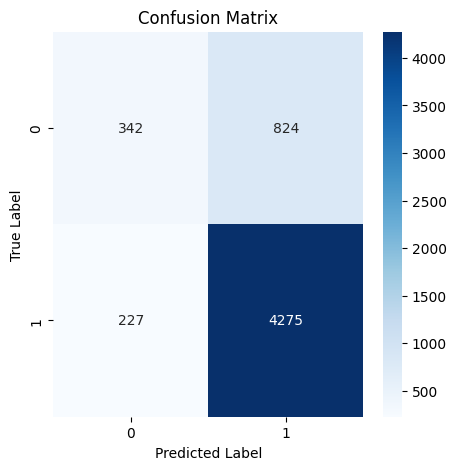

              precision    recall  f1-score   support

           0       0.60      0.29      0.39      1166
           1       0.84      0.95      0.89      4502

    accuracy                           0.81      5668
   macro avg       0.72      0.62      0.64      5668
weighted avg       0.79      0.81      0.79      5668



In [16]:

# Define features and target
X = large_companies_filtered.drop(columns=['target'])
y = large_companies_filtered['target']

# Define dataset sizes
N = len(large_companies_filtered)
train_end = int(0.7 * N)
test_end = int(0.85 * N)

# Split data sequentially
X_train, y_train = X.iloc[:train_end], y.iloc[:train_end]
X_test, y_test = X.iloc[train_end:test_end], y.iloc[train_end:test_end]
X_val, y_val = X.iloc[test_end:], y.iloc[test_end:]

# Initialize and train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions on test set
y_test_pred = rf_clf.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Display confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report (precision, recall, F1-score)
print(classification_report(y_test, y_test_pred))

In [17]:
# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_clf.feature_importances_
})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
feature_importance_df

,Feature,Importance
3,sma200_close,0.134079
2,sma50_close,0.092179
0,close,0.081995
19,neg,0.041904
4,sma50_vol,0.040782
6,Topic_1,0.040050
12,Topic_7,0.039497
5,sma200_vol,0.039193
14,Topic_9,0.038373
11,Topic_6,0.038038


In [14]:
large_companies_filtered.target.value_counts()/ 37788


target
1    0.645972
0    0.354028
Name: count, dtype: float64

In [15]:
sme = main_data_sorted[~main_data_sorted['tick'].isin(top1000['tick'])]

In [16]:
sme

,id,url,file_from,tagged,transcript,clean,date,stock,tick,meeting_date,...,Topic_8,Topic_9,Topic_10,LM_Positive,LM_Negative,LM_Uncertainty,neg,neu,pos,target
7373,5584,https://seekingalpha.com/article/3042986-arts-...,0015,"Art’s Way Manufacturing, Inc. (NASDAQ:ARTW) Q1...","[Art’s Way Manufacturing, Inc. (NASDAQ:ARTW) Q...",manufacturing artw majeski analysts rebotsky m...,2015-03-31,NASDAQ,ARTW,2011-03-31,...,0.117994,0.317289,0.000161,39,38,11,0.033,0.844,0.123,1
59179,209,https://seekingalpha.com/article/1094451-frank...,0095,Franklin Covey Company (NYSE:FC) F1Q2013 Earni...,[Franklin Covey Company (NYSE:FC) F1Q2013 Earn...,corporate controller financial marketing analy...,2013-01-04,NYSE,FC,2012-01-03,...,0.000088,0.209936,0.274138,76,65,21,0.007,0.844,0.148,1
50241,7180,https://seekingalpha.com/article/1145471-glads...,0075,Gladstone Capital Corporation (NASDAQ:GLAD) F1...,[Gladstone Capital Corporation (NASDAQ:GLAD) F...,corporation stelljes investment financial anal...,2013-01-31,NASDAQ,GLAD,2012-01-30,...,0.000149,0.043312,0.000149,31,74,31,0.034,0.830,0.136,0
100598,1486,https://seekingalpha.com/article/1149171-bebe-...,0155,"bebe stores, inc. (OTC:BEBE) F2Q13 Earnings Ca...","[bebe stores, inc. (OTC:BEBE) F2Q13 Earnings C...",corporate controller birkhold operating financ...,2013-01-31,OTC,BEBE,2012-01-31,...,0.000202,0.123367,0.005833,20,29,21,0.020,0.812,0.168,1
56222,6151,https://seekingalpha.com/article/1161311-jack-...,0085,"Jack Henry & Associates, Inc. (NASDAQ:JKHY) F2...","[Jack Henry & Associates, Inc. (NASDAQ:JKHY) F...",associates jkhy financial treasurer analysts t...,2013-02-06,NASDAQ,JKHY,2012-02-06,...,0.000150,0.309213,0.483820,19,38,16,0.022,0.811,0.167,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5594,2979,https://seekingalpha.com/article/4610100-sofi-...,0015,"SoFi Technologies, Inc. (NASDAQ:SOFI) Piper Sa...","[SoFi Technologies, Inc. (NASDAQ:SOFI) Piper S...",technologies exchange honored financial servic...,2023-06-08,NASDAQ,SOFI,2023-06-07,...,0.049032,0.000209,0.412303,34,26,6,0.034,0.819,0.148,1
14584,5731,https://seekingalpha.com/article/4610003-j-jil...,0025,"J.Jill, Inc. (NYSE:JILL) Q1 2023 Earnings Conf...","[J.Jill, Inc. (NYSE:JILL) Q1 2023 Earnings Con...",spofford operating kloppenburg jjk research sp...,2023-06-08,NYSE,JILL,2023-06-07,...,0.000271,0.092587,0.000271,23,27,9,0.023,0.825,0.152,1
5573,2958,https://seekingalpha.com/article/4610145-semte...,0015,Semtech Corporation (NASDAQ:SMTC) Q1 2024 Earn...,[Semtech Corporation (NASDAQ:SMTC) Q1 2024 Ear...,semtech corporation smtc anojja securities fbr...,2023-06-08,NASDAQ,SMTC,2023-06-07,...,0.644870,0.144094,0.199318,58,34,27,0.027,0.806,0.167,0
5567,2952,https://seekingalpha.com/article/4610188-trans...,0015,Transcontinental Inc. (OTCPK:TCLAF) wQ2 2023 E...,[Transcontinental Inc. (OTCPK:TCLAF) wQ2 2023 ...,otcpk tclaf director marcoux lecavalier nation...,2023-06-09,OTCPK,TCLAF,2023-06-08,...,0.000219,0.545147,0.000219,28,27,10,0.021,0.807,0.172,0


In [18]:
X1 = sme.iloc[:,10:].drop('target', axis=1)
y1 = sme['target']


In [19]:
y1

7373      1
59179     1
50241     0
100598    1
56222     1
         ..
5594      1
14584     1
5573      0
5567      0
5565      1
Name: target, Length: 98734, dtype: category
Categories (2, int64): [0, 1]

In [20]:
y1.value_counts().reset_index()['count'] / 98734


0    0.506391
1    0.493609
Name: count, dtype: float64

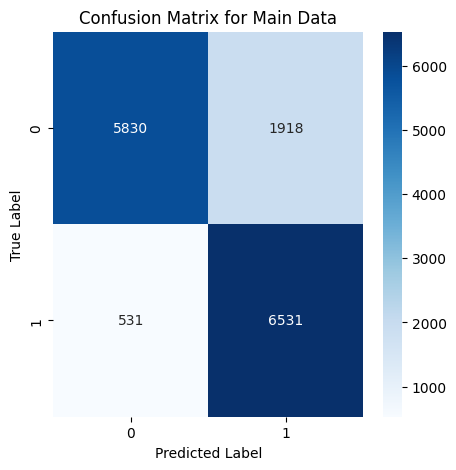

              precision    recall  f1-score   support

           0       0.92      0.75      0.83      7748
           1       0.77      0.92      0.84      7062

    accuracy                           0.83     14810
   macro avg       0.84      0.84      0.83     14810
weighted avg       0.85      0.83      0.83     14810



In [24]:

# Define dataset sizes
N1 = len(X1)
train_end1 = int(0.7 * N1)
test_end1 = int(0.85 * N1)

# Split data sequentially
X1_train, y1_train = X1.iloc[:train_end1], y1.iloc[:train_end1]
X1_test, y1_test = X1.iloc[train_end1:test_end1], y1.iloc[train_end1:test_end1]
X1_val, y1_val = X1.iloc[test_end1:], y1.iloc[test_end1:]

# Initialize and train Random Forest Classifier
rf_clf1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf1.fit(X1_train, y1_train)

# Make predictions on test set
y1_test_pred = rf_clf1.predict(X1_test)

# Compute confusion matrix
conf_matrix1 = confusion_matrix(y1_test, y1_test_pred)

# Display confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Main Data")
plt.show()

# Print classification report (precision, recall, F1-score)
print(classification_report(y1_test, y1_test_pred))

In [25]:
large_companies.tick.value_counts()


tick
T       139
F       127
V       126
CSCO    119
MA      115
       ... 
FCFS      1
THO       1
FBIN      1
TROW      1
UPBD      1
Name: count, Length: 924, dtype: int64

In [26]:
sme.tick.value_counts()


tick
MDT      89
SIRI     87
EXEL     84
SRPT     79
MNKD     74
         ..
KLDO      1
HNHAF     1
NEMTF     1
KZR       1
LFCR      1
Name: count, Length: 5202, dtype: int64

Text(0.5, 1.0, 'Top 20 Most Important Features in Random Forest Model')

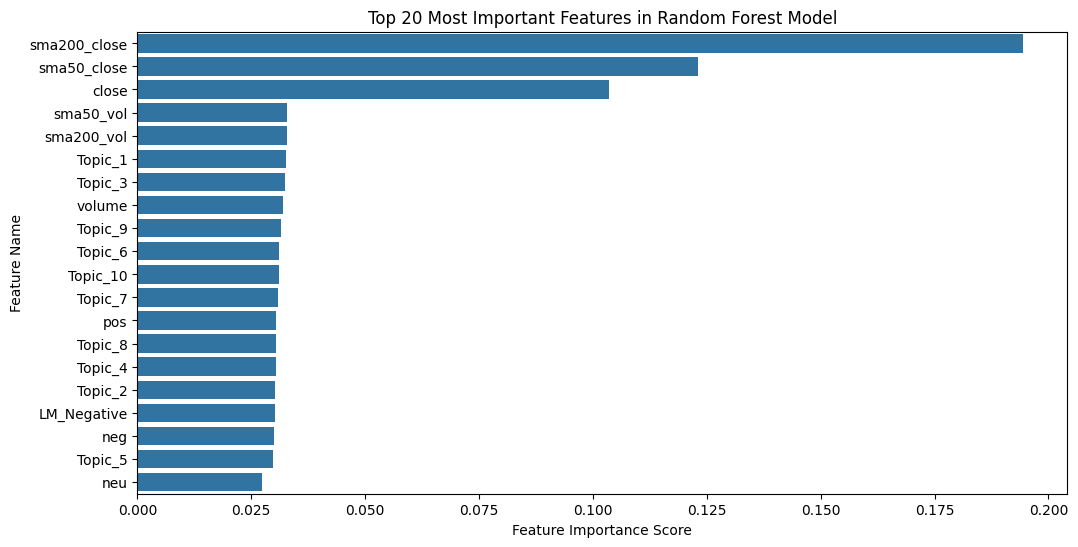

In [27]:
# Get feature importances from the trained Random Forest model
feature_importances1 = rf_clf1.feature_importances_

# Get feature names (assuming X_train is a pandas DataFrame)
feature_names = X_train.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importances1)[::-1]

# Plot top 20 most important features
plt.figure(figsize=(12, 6))
sns.barplot(x=np.array(feature_importances1)[sorted_idx[:20]], y=np.array(feature_names)[sorted_idx[:20]])
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.title("Top 20 Most Important Features in Random Forest Model")

In [28]:
# Create a DataFrame with feature names and their importance scores
feature_importance_df1 = pd.DataFrame({
    'Feature': X1_train.columns,
    'Importance': rf_clf1.feature_importances_
})

# Sort by importance in descending order
feature_importance_df = feature_importance_df1.sort_values(by="Importance", ascending=False)
feature_importance_df

,Feature,Importance
3,sma200_close,0.194455
2,sma50_close,0.122967
0,close,0.103508
4,sma50_vol,0.032823
5,sma200_vol,0.032757
6,Topic_1,0.032690
8,Topic_3,0.032468
1,volume,0.031884
14,Topic_9,0.031559
11,Topic_6,0.031110


In [29]:
# Compute permutation importance on the test set
perm_importance1 = permutation_importance(rf_clf1, X1_test, y1_test, n_repeats=10, random_state=42)

# Create a DataFrame to store the results
feature_importance_df1 = pd.DataFrame({
    'Feature': X1_test.columns,
    'Random Forest Importance': rf_clf1.feature_importances_,
    'Permutation Importance Mean': perm_importance1.importances_mean,
    'Permutation Importance Std': perm_importance1.importances_std
})

# Sort by permutation importance mean in descending order
feature_importance_df1 = feature_importance_df1.sort_values(by="Permutation Importance Mean", ascending=False)
feature_importance_df1

,Feature,Random Forest Importance,Permutation Importance Mean,Permutation Importance Std
2,sma50_close,0.122967,0.299244,0.004245
3,sma200_close,0.194455,0.273410,0.003628
0,close,0.103508,0.258818,0.003477
17,LM_Negative,0.030211,0.001067,0.000764
18,LM_Uncertainty,0.025959,0.000567,0.001300
7,Topic_2,0.030277,0.000155,0.000682
6,Topic_1,0.032690,-0.000446,0.001161
12,Topic_7,0.030831,-0.000777,0.001002
19,neg,0.030051,-0.001182,0.001094
11,Topic_6,0.031110,-0.001411,0.001061


In [30]:
top1000

,Rank,Company,Ticker,Sector,Industry,Profitable,Founder_is_CEO,FemaleCEO,Growth_in_Jobs,Change_in_Rank,...,CEO,Country,HeadquartersCity,HeadquartersState,Website,CompanyType,Footnote,MarketCap_Updated_M,Updated,tick
0,1,Walmart,WMT,Retailing,General Merchandisers,yes,no,no,no,0.0,...,C. Douglas McMillon,U.S.,Bentonville,Arkansas,https://www.stock.walmart.com,Public,"Figures are for fiscal year ended Jan. 31, 202...",559911.0,2024-08-05,WMT
1,2,Amazon,AMZN,Retailing,Internet Services and Retailing,yes,no,no,no,0.0,...,Andrew R. Jassy,U.S.,Seattle,Washington,https://www.amazon.com,Public,"Market value as of July 15, 2024.",2005565.0,2024-08-05,AMZN
2,3,Apple,AAPL,Technology,"Computers, Office Equipment",yes,no,no,no,1.0,...,Timothy D. Cook,U.S.,Cupertino,California,https://www.apple.com,Public,"Figures are for fiscal year ended Sept. 30, 20...",3594309.0,2024-08-05,AAPL
3,4,UnitedHealth Group,UNH,Health Care,Health Care: Insurance and Managed Care,yes,no,no,yes,1.0,...,Andrew P. Witty,U.S.,Minnetonka,Minnesota,https://www.unitedhealthgroup.com,Public,"Market value as of July 15, 2024.",474339.0,2024-08-05,UNH
4,5,Berkshire Hathaway,BRKA,Financials,Insurance: Property and Casualty (Stock),yes,no,no,yes,2.0,...,Warren E. Buffett,U.S.,Omaha,Nebraska,https://www.berkshirehathaway.com,Public,"Market value as of July 15, 2024.",937028.0,2024-08-05,BRKA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Allegiant Travel,ALGT,Transportation,Airlines,yes,no,no,yes,0.0,...,Maurice J. Gallagher Jr.,U.S.,Las Vegas,Nevada,https://www.allegiant.com,Public,"Market value as of March 28, 2024.",1375.0,2024-06-04,ALGT
996,997,Dropbox,DBX,Technology,Computer Software,yes,yes,no,no,0.0,...,Andrew W. Houston,U.S.,San Francisco,California,https://www.dropbox.com,Public,"Market value as of March 28, 2024.",8359.0,2024-06-04,DBX
997,998,Exact Sciences,EXAS,Health Care,Pharmaceuticals,no,no,no,yes,0.0,...,Kevin T. Conroy,U.S.,Madison,Wisconsin,https://www.exactsciences.com,Public,"Market value as of March 28, 2024.",12537.0,2024-06-04,EXAS
998,999,BWX Technologies,BWXT,Aerospace & Defense,Aerospace & Defense,yes,no,no,yes,0.0,...,Rex D. Geveden,U.S.,Lynchburg,Virginia,https://www.bwxt.com,Public,"Market value as of March 28, 2024.",9380.0,2024-06-04,BWXT


In [31]:
folder_path

'/Volumes/D/Earnings/data'